**TUGAS 5**

Nama: RAHMA NURHALIZA

NIM  : 210411100176

Kelas : PPW A

# Ringkas Berita

Mengambil 1 dokumen berita ektrak kalimat jadi objek, hitung tfidf,Cosine similarity, buat grafnya, mencari centrality dan ringkas

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
df = pd.read_csv("/content/drive/MyDrive/PPW/tugas/1berita.csv")
df.head(1)

,judul,berita,tanggal,kategori
0,2 Oknum Suporter Persija Jadi Tersangka Perusa...,Polisi menetapkan dua orang oknum suporter Per...,"Rabu, 25 Sep 2024 01:00 WIB",Olahraga


In [ ]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

## Menghitung TF-IDF untuk setiap Kalimat

In [ ]:
import nltk
from sklearn.feature_extraction.text import TfidfVectorizer

# Tokenisasi kalimat dari teks berita
kalimat = nltk.sent_tokenize(df['berita'][0])

# Menghitung TF-IDF untuk setiap kalimat
vectorizer = TfidfVectorizer()
tfidf_matrix = vectorizer.fit_transform(kalimat)

#DataFrame
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=vectorizer.get_feature_names_out(), index=kalimat)

# Menampilkan hasil TF-IDF dalam bentuk DataFrame
print("TF-IDF per Kalimat:")
tfidf_df.head(20)
#print(tfidf_df)

# Menampilkan hasil TF-IDF
#print("TF-IDF Matrix per Kalimat:")
#print(tfidf_matrix.toarray())
#tfidf_matrix()


TF-IDF per Kalimat:


,12,13,170,20,23,24,ada,adapun,akhirnya,akp,...,ujarnya,ungkapnya,untuk,usai,video,viking,viral,warga,warudoyong,yang
"Polisi menetapkan dua orang oknum suporter Persija Jakarta sebagai tersangka kasus perusakan rumah di Sukabumi, Jawa Barat.",0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
"Kasat Reskrim Polres Sukabumi Kota AKP Bagus Panuntun mengatakan, penetapan tersangka itu dilakukan setelah penyidik melakukan pemeriksaan secara maraton sejak mereka ditangkap kurang dari 12 jam pascakejadian.",0.207838,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.207838,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Kedua tersangka itu berperan sebagai perusak spanduk Viking Persib.,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.335412,0.000000,0.000000,0.000000,0.000000
"""Sementara ini menetapkan dua tersangka yang merusak banner, namun untuk yang merusak pagar ini yang kelihatan di (video) viral tersebut, saat ini masih dalam pengejaran,"" kata Bagus seperti dikutip detikJabar, Selasa (24/9).",0.000000,0.000000,0.000000,0.000000,0.000000,0.178708,0.00000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.156767,0.000000,0.156767,0.000000,0.141200,0.000000,0.000000,0.423601
"Pilihan Redaksi Pelatih Timor Leste U-20 Tolak Panggil Gali Freitas Lawan Indonesia Ketua Viking Minta Maaf, Siap Tanggung Jawab Jika Anggota Terlibat Reaksi Ragnar Oratmangoen usai Debut Negatif di Liga Belgia Bagus belum mau menyebutkan dua identitas tersangka tersebut.",0.000000,0.000000,0.000000,0.167804,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.167804,0.000000,0.147202,0.000000,0.000000,0.000000,0.000000
"Hanya saja, ia menyebut keduanya terancam pidana Pasal 170 dengan ancaman hukuman maksimal 4 tahun penjara.",0.000000,0.000000,0.258199,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
"""Hukumannya sama seperti semalam, dia merusak banner, memasuki pekarangan rumah kemudian di situ memprovokasi.",0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
"Jadi sampai saat ini kami masih melakukan pendalaman untuk tersangka lainnya, kemungkinan masih bisa bertambah,"" ujarnya.",0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,...,0.260174,0.000000,0.228232,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
"Selain memeriksa 13 orang suporter yang diamankan, polisi juga turut memanggil ketua suporter ke Polsek Warudoyong.",0.000000,0.259728,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.227841,0.205217
"""Kita baru menghadirkan ketua suporternya, tadi baru hadir dan saat ini baru dilakukan pemeriksaan,"" kata Bagus.",0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


## Cosinus Similiarity

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity
cosine = cosine_similarity(tfidf_matrix)
similarity = pd.DataFrame(cosine, columns=range(
        len(kalimat)), index=range(len(kalimat)))

similarity.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,1.000000,0.060391,0.127084,0.106763,0.063082,0.0,0.070906,0.028848,0.208395,0.000000,0.077875,0.048643,0.065733,0.027100,0.102631,0.089283,0.073562,0.067039,0.000000
1,0.060391,1.000000,0.080225,0.033700,0.031644,0.0,0.000000,0.054589,0.000000,0.097700,0.095357,0.035125,0.078356,0.000000,0.103650,0.000000,0.000000,0.000000,0.000000
2,0.127084,0.080225,1.000000,0.026323,0.074090,0.0,0.000000,0.038323,0.000000,0.000000,0.000000,0.159863,0.000000,0.000000,0.058986,0.000000,0.055403,0.060419,0.000000
3,0.106763,0.033700,0.026323,1.000000,0.070479,0.0,0.147056,0.236603,0.086930,0.144334,0.024176,0.126720,0.140911,0.052247,0.013097,0.097708,0.014709,0.101303,0.070831
4,0.063082,0.031644,0.074090,0.070479,1.000000,0.0,0.014975,0.016819,0.027209,0.043872,0.000000,0.028359,0.000000,0.015800,0.012298,0.052052,0.049651,0.000000,0.000000


Jumlah Node: 19
Jumlah Edge: 52


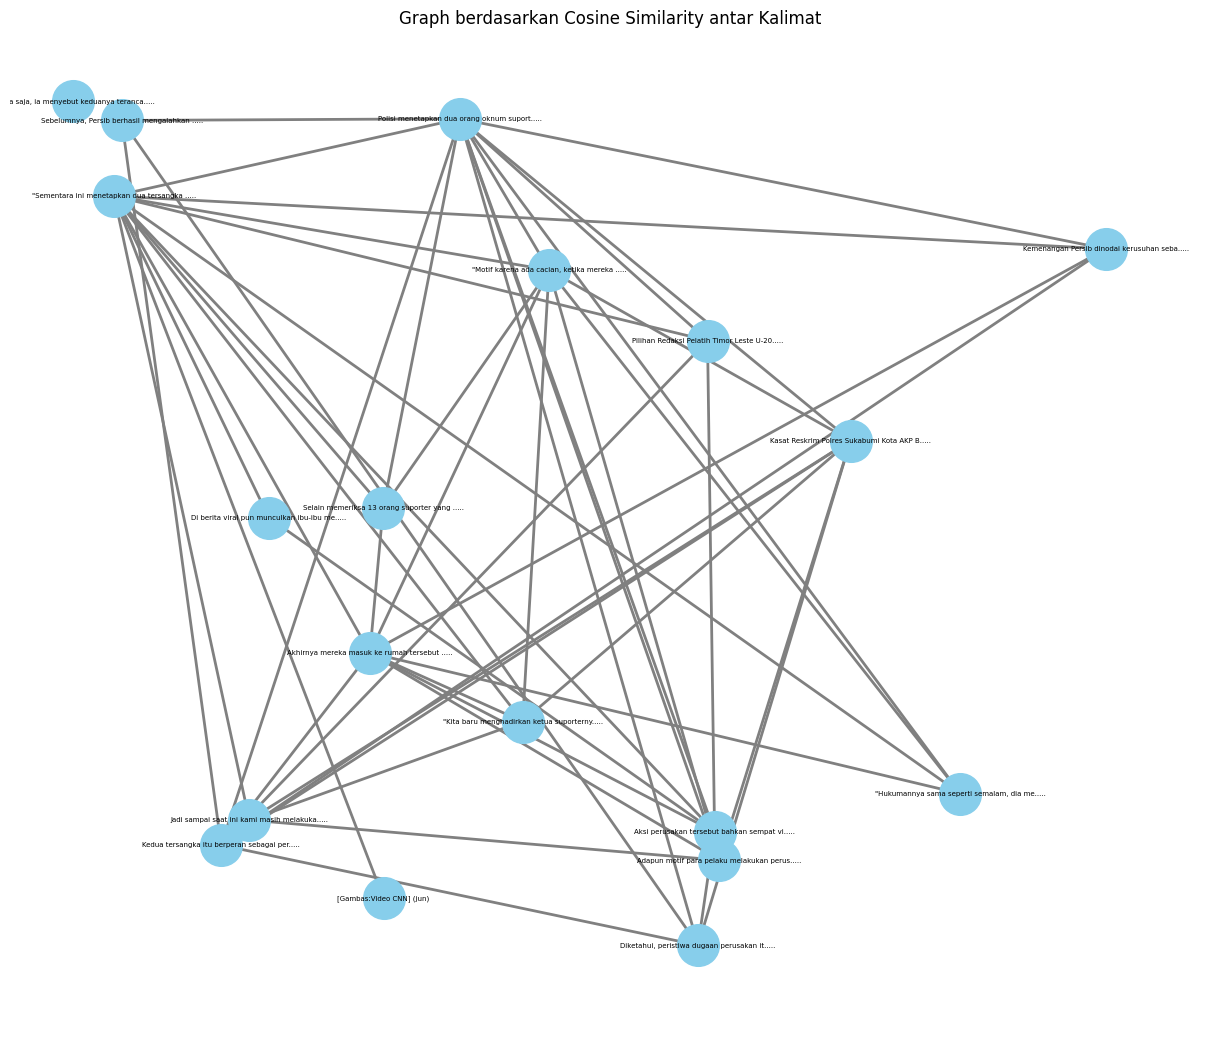

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

# Membuat graf kosong
G = nx.Graph()

# Menambahkan node dan edge berdasarkan cosine similarity
for i in range(len(cosine)):
    G.add_node(i)

for i in range(len(cosine)):
    for j in range(len(cosine)):
        similarity = cosine[i][j]
        if similarity >= 0.05 and i != j:  # Mengubah dari > 0.5 menjadi >= 0.5
            G.add_edge(i, j)


# Memotong kalimat menjadi lebih pendek
def potong_kalimat(kalimat, max_len=40):
    if len(kalimat) > max_len:
        return kalimat[:max_len] + '.....'
    return kalimat

# Membuat label node dengan kalimat yang dipotong
labels = {i: potong_kalimat(kalimat[i], max_len=40) for i in range(len(kalimat))}


# Menggambar graf
plt.figure(figsize=(12, 10))

# Layout untuk penempatan node
pos = nx.random_layout(G, seed=42)

# Menggambar node, edge, dan label kalimat
nx.draw(G, pos, with_labels=False, node_color='skyblue', node_size=900, edge_color='gray', width=2)

# Menggambar label dengan kalimat yang sudah dipotong di dalam node
nx.draw_networkx_labels(G, pos, labels, font_size=5, font_color="black", verticalalignment='center', horizontalalignment='center')

# Menampilkan jumlah node dan edge
print("Jumlah Node:", nx.number_of_nodes(G))
print("Jumlah Edge:", nx.number_of_edges(G))

# Menampilkan plot
plt.title("Graph berdasarkan Cosine Similarity antar Kalimat")
plt.show()


In [ ]:
# Menghitung betweenness centrality
betweenness_centrality = nx.betweenness_centrality(G)

# Menampilkan betweenness centrality tertinggi
print("\nBetweenness centrality tertinggi:")
ranked_by_betweenness = sorted(((betweenness_centrality[i], s) for i, s in enumerate(kalimat)), reverse=True)
for i, (score, sentence) in enumerate(ranked_by_betweenness[:5]):
    print(f"{i+1}. (betweenness centrality: {score:.4f} {sentence} )")


Betweenness centrality tertinggi:
1. (betweenness centrality: 0.2515 "Sementara ini menetapkan dua tersangka yang merusak banner, namun untuk yang merusak pagar ini yang kelihatan di (video) viral tersebut, saat ini masih dalam pengejaran," kata Bagus seperti dikutip detikJabar, Selasa (24/9). )
2. (betweenness centrality: 0.1729 Polisi menetapkan dua orang oknum suporter Persija Jakarta sebagai tersangka kasus perusakan rumah di Sukabumi, Jawa Barat. )
3. (betweenness centrality: 0.0609 Akhirnya mereka masuk ke rumah tersebut dan merusak pagar hingga mencabut spanduk Persib. )
4. (betweenness centrality: 0.0563 Aksi perusakan tersebut bahkan sempat viral di media sosial. )
5. (betweenness centrality: 0.0475 Kasat Reskrim Polres Sukabumi Kota AKP Bagus Panuntun mengatakan, penetapan tersangka itu dilakukan setelah penyidik melakukan pemeriksaan secara maraton sejak mereka ditangkap kurang dari 12 jam pascakejadian. )


In [ ]:
# Urutkan kalimat berdasarkan nilai centrality tertinggi
ranked_sentences = sorted(((betweenness_centrality[i], s) for i, s in enumerate(kalimat)), reverse=True)

#Ringkas
summary_sentences = [sentence for _, sentence in ranked_sentences[:4]]
summary = ' '.join(summary_sentences)

# Menampilkan ringkasan
print("Ringkasan Berita:")
summary

Ringkasan Berita:


'"Sementara ini menetapkan dua tersangka yang merusak banner, namun untuk yang merusak pagar ini yang kelihatan di (video) viral tersebut, saat ini masih dalam pengejaran," kata Bagus seperti dikutip detikJabar, Selasa (24/9). Polisi menetapkan dua orang oknum suporter Persija Jakarta sebagai tersangka kasus perusakan rumah di Sukabumi, Jawa Barat. Akhirnya mereka masuk ke rumah tersebut dan merusak pagar hingga mencabut spanduk Persib. Aksi perusakan tersebut bahkan sempat viral di media sosial.'